# Demo for a Cell Painting dataset

To reproduce this notebook, first activate the `demo_environment.yml` using conda:

```bash
conda env create --force --file demo_environment.yml
conda activate cytominer-eval-demo
```

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%load_ext autoreload  
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%pwd
%cd Cellpainting/cj-datasets

'/home/kevin/WSL-shared'

/home/kevin/WSL-shared/Cellpainting/cj-datasets


In [3]:
import sys
sys.path


['/home/kevin/miniforge3/envs/ptsnnl/lib/python311.zip',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/lib-dynload',
 '',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/cytominer_eval-0.1-py3.11.egg']

In [4]:
# for p in ['/home/kevin/WSL_shared/Cellpainting/cytominer_eval']:
#     if p not in sys.path:
#         print(f"insert {p}")
#         sys.path.insert(0, p)
import numpy as np
import pandas as pd
from sklearn import preprocessing
import plotnine as gg

In [5]:
sys.path

['/home/kevin/miniforge3/envs/ptsnnl/lib/python311.zip',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/lib-dynload',
 '',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages',
 '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/cytominer_eval-0.1-py3.11.egg']

In [7]:

from cytominer_eval import evaluate
# import cytominer_eval.cytominer_eval 
from pycytominer.cyto_utils import infer_cp_features

# import utils

In [8]:
def load_cell_health(commit="7d63d4a43014c757fd0c77c0fd1c19540f17cc3d"):
    base_url = f"https://github.com/broadinstitute/cell-health/raw/{commit}"

    url = f"{base_url}/1.generate-profiles/data/processed/cell_health_profiles_merged.tsv.gz"
    df = pd.read_csv(url, sep="\t")

    return df

### Load the Cell Health profile datasets

The dataset measures CRISPR perturbations in a Cell Painting experiment.

> Predicting cell health phenotypes using image-based morphology profiling.
> Gregory P. Way, Maria Kost-Alimova, Tsukasa Shibue, William F. Harrington, Stanley Gill, Federica Piccioni, Tim Becker, Hamdah Shafqat-Abbasi, William C. Hahn, Anne E. Carpenter, Francisca Vazquez, Shantanu Singh
> bioRxiv 2020.07.08.193938; doi: https://doi.org/10.1101/2020.07.08.193938

In [9]:
df = load_cell_health()
df.info
print(df.shape)
df.head()

<bound method DataFrame.info of      Metadata_Plate Metadata_Well  Metadata_WellCol Metadata_WellRow  \
0        SQ00014618           A01                 1                A   
1        SQ00014618           A02                 2                A   
2        SQ00014618           A03                 3                A   
3        SQ00014618           A04                 4                A   
4        SQ00014618           A05                 5                A   
...             ...           ...               ...              ...   
3451     SQ00014614           P20                20                P   
3452     SQ00014614           P21                21                P   
3453     SQ00014614           P22                22                P   
3454     SQ00014614           P23                23                P   
3455     SQ00014614           P24                24                P   

     Metadata_cell_line Metadata_gene_name Metadata_pert_name  \
0                 HCC44              E

(3456, 956)


,Metadata_Plate,Metadata_Well,Metadata_WellCol,Metadata_WellRow,Metadata_cell_line,Metadata_gene_name,Metadata_pert_name,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,...,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_20_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_20_0,Nuclei_Texture_Variance_DNA_5_0
0,SQ00014618,A01,1,A,HCC44,EMPTY,EMPTY,-0.894997,-1.515696,-1.787667,...,0.107581,-0.659049,-0.676846,-1.229791,-1.336051,-1.125138,-0.972360,-1.393856,-1.244227,-1.308729
1,SQ00014618,A02,2,A,HCC44,MCL1,MCL1-5,-0.479926,0.246423,0.629901,...,0.165935,1.999006,1.204036,0.560228,0.686189,0.601634,1.154001,0.596441,0.680359,0.715469
2,SQ00014618,A03,3,A,HCC44,AKT1,AKT1-1,-0.635578,0.416772,0.039795,...,-1.358338,0.155556,-0.112177,-1.258864,-1.394609,-1.277509,-0.128419,-1.359460,-1.299859,-1.396879
3,SQ00014618,A04,4,A,HCC44,KRAS,KRAS-2B,1.024707,0.645336,0.714847,...,-0.975661,-0.931362,-0.809894,-1.526434,-1.541661,-1.482596,-1.004789,-1.817028,-1.887102,-1.681831
4,SQ00014618,A05,5,A,HCC44,AKT1,AKT1-2,-2.036443,0.159822,0.736176,...,-0.575835,0.093271,-0.298606,-0.564712,-0.512144,-0.513650,-0.438356,-0.562306,-0.276279,-0.547497


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Columns: 956 entries, Metadata_Plate to Nuclei_Texture_Variance_DNA_5_0
dtypes: float64(949), int64(1), object(6)
memory usage: 25.2+ MB


#### Set feature information

Note that the profiling dataset has columns representing metadata and profiling feature measurements.

In [11]:
features = infer_cp_features(df)
features[:20]
features[-20:]

['Cells_AreaShape_Center_Y',
 'Cells_AreaShape_Compactness',
 'Cells_AreaShape_Eccentricity',
 'Cells_AreaShape_Extent',
 'Cells_AreaShape_Orientation',
 'Cells_AreaShape_Zernike_0_0',
 'Cells_AreaShape_Zernike_1_1',
 'Cells_AreaShape_Zernike_2_0',
 'Cells_AreaShape_Zernike_2_2',
 'Cells_AreaShape_Zernike_3_3',
 'Cells_AreaShape_Zernike_4_0',
 'Cells_AreaShape_Zernike_4_2',
 'Cells_AreaShape_Zernike_5_1',
 'Cells_AreaShape_Zernike_5_3',
 'Cells_AreaShape_Zernike_5_5',
 'Cells_AreaShape_Zernike_6_0',
 'Cells_AreaShape_Zernike_6_2',
 'Cells_AreaShape_Zernike_6_4',
 'Cells_AreaShape_Zernike_7_1',
 'Cells_AreaShape_Zernike_7_3']

['Nuclei_Texture_SumAverage_RNA_20_0',
 'Nuclei_Texture_SumAverage_RNA_5_0',
 'Nuclei_Texture_SumEntropy_AGP_10_0',
 'Nuclei_Texture_SumEntropy_AGP_20_0',
 'Nuclei_Texture_SumEntropy_AGP_5_0',
 'Nuclei_Texture_SumEntropy_DNA_10_0',
 'Nuclei_Texture_SumEntropy_DNA_20_0',
 'Nuclei_Texture_SumEntropy_DNA_5_0',
 'Nuclei_Texture_SumEntropy_ER_5_0',
 'Nuclei_Texture_SumEntropy_Mito_5_0',
 'Nuclei_Texture_SumEntropy_RNA_5_0',
 'Nuclei_Texture_SumVariance_AGP_20_0',
 'Nuclei_Texture_SumVariance_AGP_5_0',
 'Nuclei_Texture_SumVariance_DNA_10_0',
 'Nuclei_Texture_SumVariance_DNA_20_0',
 'Nuclei_Texture_SumVariance_DNA_5_0',
 'Nuclei_Texture_Variance_AGP_5_0',
 'Nuclei_Texture_Variance_DNA_10_0',
 'Nuclei_Texture_Variance_DNA_20_0',
 'Nuclei_Texture_Variance_DNA_5_0']

In [12]:
meta_features = infer_cp_features(df, metadata=True)
meta_features

['Metadata_Plate',
 'Metadata_Well',
 'Metadata_WellCol',
 'Metadata_WellRow',
 'Metadata_cell_line',
 'Metadata_gene_name',
 'Metadata_pert_name']

### Collect metrics per cell line

We profiled three cell lines in this dataset: A549, ES2, and HCC44.

Use gene and perturbation (CRISPR guide) to denote replicates.

### Part 1: Replicate reproducibility

`operation="replicate_reproducibility"`

Cytominer-eval can quickly calculate median pairwise correlations for all perturbations in a dataset.

We can also use replicate reproducibility to calculate a "percent matching" score.
Percent matching is the fraction of replicate pairs that are more similar to each other than 95% of non-replicate pairs.

In [13]:
percent_matching_scores = []
pairwise_corrs = []

for cell_line in df.Metadata_cell_line.unique():
    print(f" Cellline : {cell_line}")
    cell_line_df = df.query("Metadata_cell_line == @cell_line")

    percent_matching, corr_df = evaluate(
        profiles=cell_line_df,
        features=features,
        meta_features=meta_features,
        replicate_groups=["Metadata_gene_name", "Metadata_pert_name"],
        operation="replicate_reproducibility",
        similarity_metric="pearson",
        replicate_reproducibility_quantile=0.95,
        replicate_reproducibility_return_median_cor=True,
    )
    
    percent_matching_bundle = [cell_line, percent_matching]
    
    percent_matching_scores.append(percent_matching_bundle)
    pairwise_corrs.append(corr_df.assign(cell_line=cell_line))

 Cellline : HCC44
 pairwise_metric shape is (1152, 1152)
 Cellline : A549
 pairwise_metric shape is (1152, 1152)
 Cellline : ES2
 pairwise_metric shape is (1152, 1152)


In [15]:
percent_matching_scores = pd.DataFrame(percent_matching_scores, columns=["cell_line", "percent_matching"])
percent_matching_scores

,cell_line,percent_matching
0,HCC44,0.109077
1,A549,0.065802
2,ES2,0.114925


In [16]:
len(pairwise_corrs)
type(pairwise_corrs[0])
pairwise_corrs[0].info()
pairwise_corrs[0].head

3

pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Metadata_gene_name  119 non-null    object 
 1   Metadata_pert_name  119 non-null    object 
 2   similarity_metric   119 non-null    float64
 3   cell_line           119 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.8+ KB


<bound method NDFrame.head of     Metadata_gene_name Metadata_pert_name  similarity_metric cell_line
0                 AKT1             AKT1-1           0.240928     HCC44
1                 AKT1             AKT1-2           0.178413     HCC44
2               ARID1B           ARID1B-1           0.220200     HCC44
3               ARID1B           ARID1B-2           0.133993     HCC44
4                 ATF4             ATF4-1           0.797046     HCC44
..                 ...                ...                ...       ...
114                TXN              TXN-2           0.146156     HCC44
115                XBP              XBP-1           0.338279     HCC44
116                XBP              XBP-2           0.380804     HCC44
117               YAP1             YAP1-1           0.039802     HCC44
118               YAP1             YAP1-2           0.124814     HCC44

[119 rows x 4 columns]>

In [17]:
pairwise_corr_df = pd.concat(pairwise_corrs).reset_index(drop=True)
print(pairwise_corr_df.shape)
pairwise_corr_df.head(50)

(357, 4)


,Metadata_gene_name,Metadata_pert_name,similarity_metric,cell_line
0,AKT1,AKT1-1,0.240928,HCC44
1,AKT1,AKT1-2,0.178413,HCC44
2,ARID1B,ARID1B-1,0.220200,HCC44
3,ARID1B,ARID1B-2,0.133993,HCC44
4,ATF4,ATF4-1,0.797046,HCC44
5,ATF4,ATF4-2,0.340263,HCC44
6,ATP50,ATP50-1,0.495201,HCC44
7,ATP50,ATP50-2,0.614932,HCC44
8,AURKB,AURKB-2,0.417446,HCC44
9,BCL2,BCL2-1,0.134808,HCC44


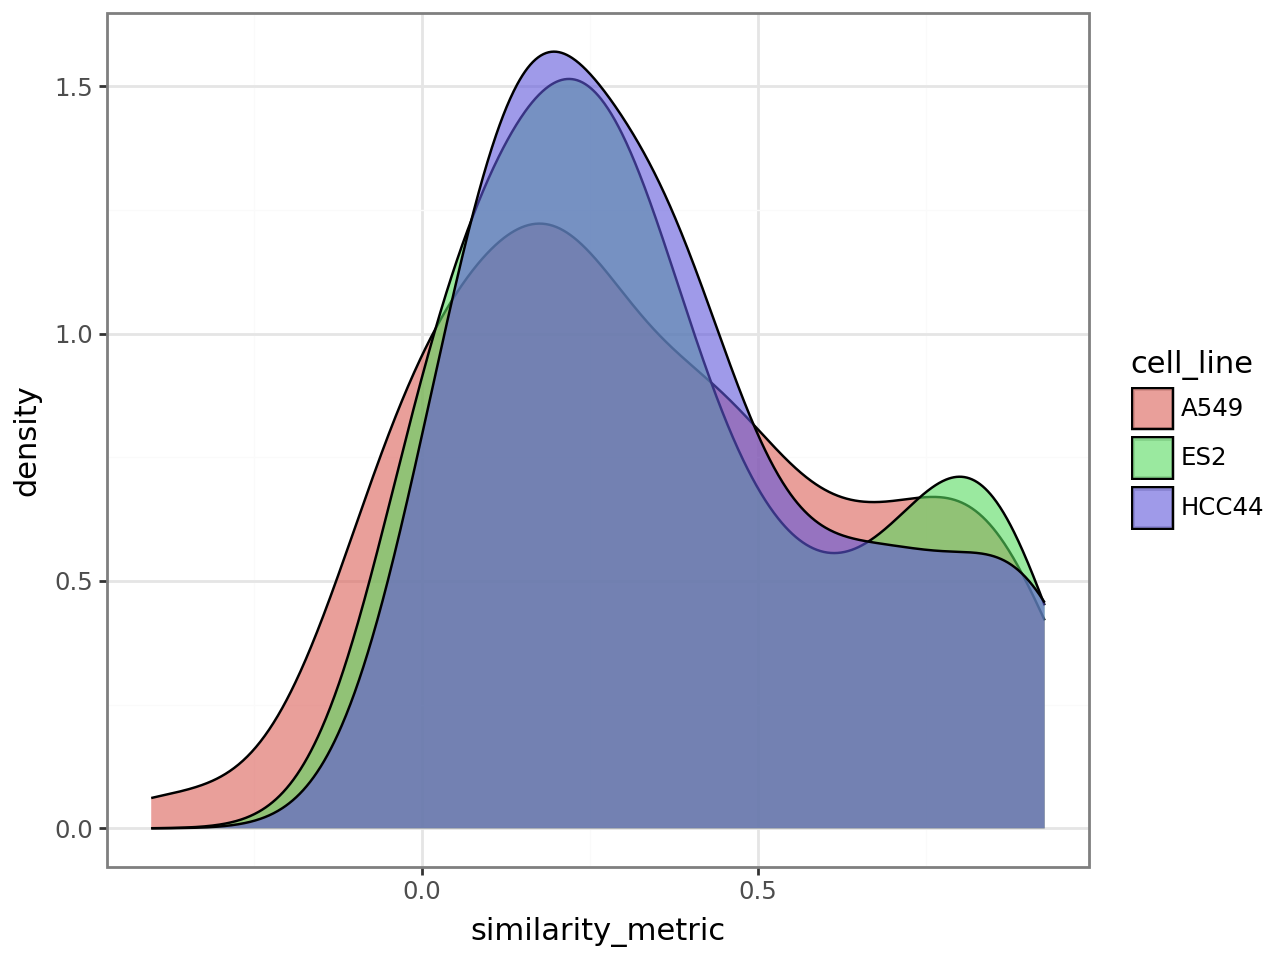

In [18]:
(
    gg.ggplot(pairwise_corr_df, gg.aes(x="similarity_metric"))
    + gg.geom_density(gg.aes(fill="cell_line"), alpha=0.6)
    + gg.theme_bw()
)

### Part 2: Replicate reproducibility

`operation="precision_recall"`

Given a profiling dataframe, cytominer-eval can quickly calculate precision and recall of all replicate perturbations.

To calculate precision recall for every perturbation, we first rank order all perturbations by pairwise correlations.
We use a user-defined `k` as a threshold for calling hits.

### Precision

precision = number of replicates selected in top k ranking / k

### Recall

recall = number of replicates selected in top k ranking / number of total replicates

Here, calculate precision and recall for a range of k.

In [23]:
meta_features

['Metadata_Plate',
 'Metadata_Well',
 'Metadata_WellCol',
 'Metadata_WellRow',
 'Metadata_cell_line',
 'Metadata_gene_name',
 'Metadata_pert_name']

In [27]:
precision_recall_at_k = []

for cell_line in df.Metadata_cell_line.unique():
    cell_line_df = df.query("Metadata_cell_line == @cell_line")
    
    k_list = [2, 3, 5, 10, 15, 25]
    
    precision_recall_results = evaluate(
        profiles=cell_line_df,
        features=features,
        meta_features=meta_features,
        replicate_groups=["Metadata_gene_name", "Metadata_pert_name"],
        operation="precision_recall",
        similarity_metric="pearson",
        groupby_columns=['Metadata_cell_line', 'Metadata_gene_name', 'Metadata_pert_name'],
        precision_recall_k=k_list
    ).assign(cell_line=cell_line)

    precision_recall_at_k.append(precision_recall_results)

 pairwise_metric shape is (1152, 1152)
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 Group by columns: ['Metadata_cell_line', 'Metadata_gene_name', 'Metadata_pert_name']
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 groupby_cols_suffix: ['Metadata_cell_line_pair_a', 'Metadata_gene_name_pair_a', 'Metadata_pert_name_pair_a']
 pairwise_metric shape is (1152, 1152)
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}


In [33]:
# precision_recall_at_k = pd.concat(precision_recall_at_k).reset_index(drop=True)
print(precision_recall_at_k.shape)
precision_recall_at_k.head(15)
precision_recall_at_k.tail(15)

(2142, 7)


,Metadata_cell_line,Metadata_gene_name,Metadata_pert_name,k,precision,recall,cell_line
0,HCC44,AKT1,AKT1-1,2.0,0.0,0.000000,HCC44
1,HCC44,AKT1,AKT1-2,2.0,0.0,0.000000,HCC44
2,HCC44,ARID1B,ARID1B-1,2.0,0.0,0.000000,HCC44
3,HCC44,ARID1B,ARID1B-2,2.0,0.0,0.000000,HCC44
4,HCC44,ATF4,ATF4-1,2.0,0.0,0.000000,HCC44
5,HCC44,ATF4,ATF4-2,2.0,0.0,0.000000,HCC44
6,HCC44,ATP50,ATP50-1,2.0,1.0,0.066667,HCC44
7,HCC44,ATP50,ATP50-2,2.0,0.0,0.000000,HCC44
8,HCC44,AURKB,AURKB-2,2.0,0.0,0.000000,HCC44
9,HCC44,BCL2,BCL2-1,2.0,0.0,0.000000,HCC44


,Metadata_cell_line,Metadata_gene_name,Metadata_pert_name,k,precision,recall,cell_line
2127,ES2,SDHB,SDHB-2,25.0,0.08,0.066667,ES2
2128,ES2,SLC2A1,SLC2A1-1,25.0,0.28,0.233333,ES2
2129,ES2,SLC2A2,SLC2A2-2,25.0,0.32,0.266667,ES2
2130,ES2,SMARCB1,SMARCB1-1,25.0,0.08,0.066667,ES2
2131,ES2,SMARCB1,SMARCB1-2,25.0,0.00,0.000000,ES2
2132,ES2,STAT3,STAT3-1,25.0,0.00,0.000000,ES2
2133,ES2,STAT3,STAT3-2,25.0,0.00,0.000000,ES2
2134,ES2,SUZ12,SUZ12-1,25.0,0.00,0.000000,ES2
2135,ES2,SUZ12,SUZ12-2,25.0,0.00,0.000000,ES2
2136,ES2,TXN,TXN-1,25.0,0.00,0.000000,ES2


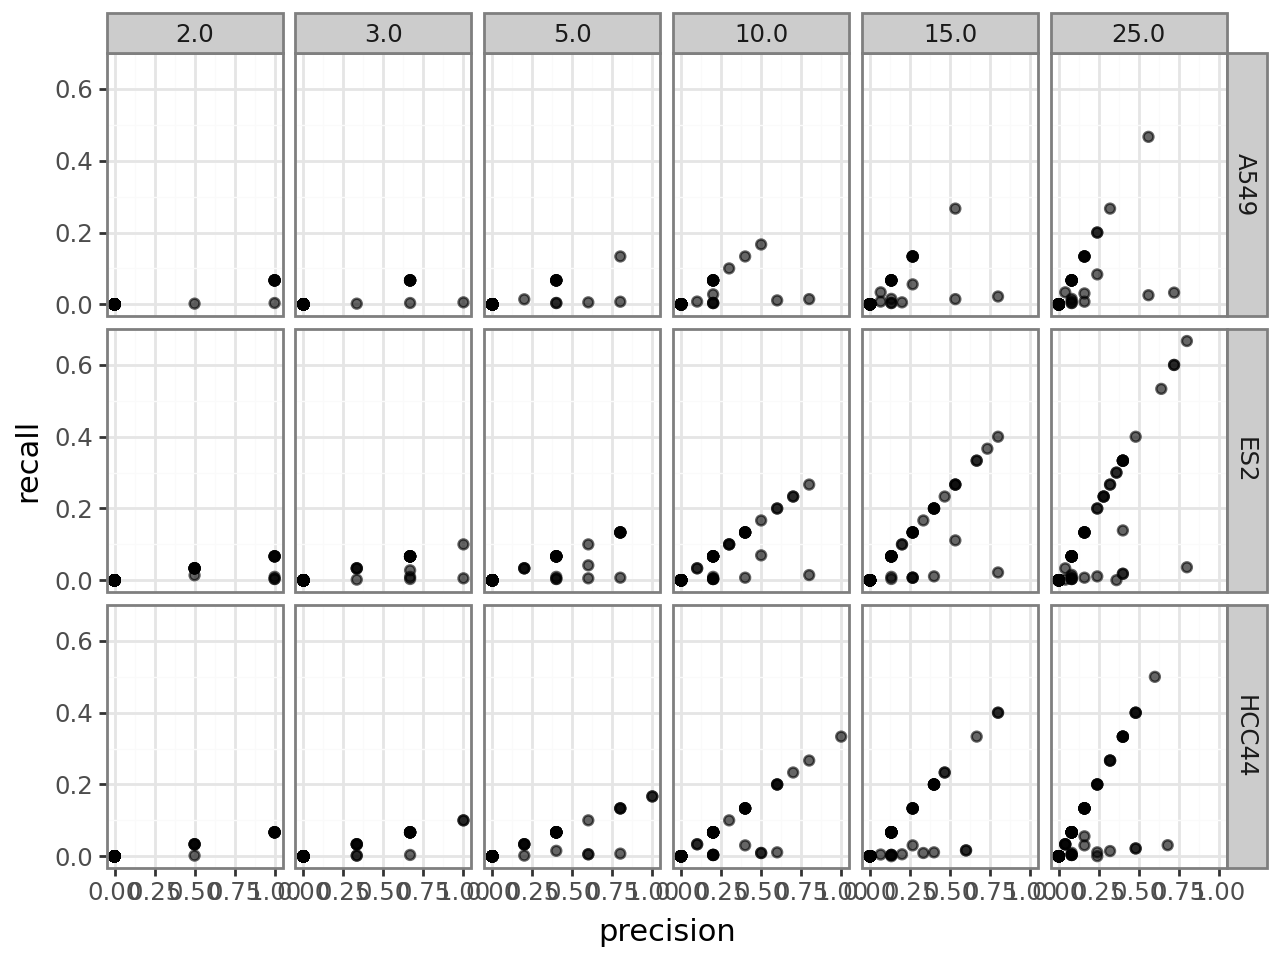

In [29]:
(
    gg.ggplot(precision_recall_at_k, gg.aes(x="precision", y="recall"))
    + gg.geom_point(alpha=0.6)
    + gg.facet_grid("cell_line~k")
    + gg.theme_bw()
)

### Part 3: mp-value

`operation="mp-value"`

Calculate the "multidimensional perturbation value" (mp-value).

> Hutz, J. et al. “The Multidimensional Perturbation Value: A Single Metric to Measure Similarity and Activity of Treatments in High-Throughput Multidimensional Screens” Journal of Biomolecular Screening, Volume: 18 issue: 4, page(s): 367-377. doi: 10.1177/1087057112469257

The mp-value is the mahalanobis distance between a perturbation and control, as compared to a randomly permuted null distribution.

**NOTE: Parts 3 and 4 (mp-value and grit) introduce the concept of _control perturbations_**

In [30]:
# Chr2 is an intergenic CRISPR cutting control
control_perts = df.query("Metadata_gene_name == 'Chr2'").Metadata_pert_name.unique().tolist()
control_perts

['Chr2-1', 'Chr2-4', 'Chr2-5', 'Chr2-2', 'Chr2-3', 'Chr2-6']

In [34]:
mp_values = []

for cell_line in df.Metadata_cell_line.unique():
    cell_line_df = df.query("Metadata_cell_line == @cell_line")
    
    for num_perm in [10, 100, 1000]:
    
        mp_results = evaluate(
            profiles=cell_line_df,
            features=features,
            meta_features=meta_features,
            replicate_groups="Metadata_pert_name",
            operation="mp_value",
            similarity_metric="pearson",
            mp_value_params={"rescale_pca": True, "nb_permutations": num_perm},
            grit_control_perts=control_perts
        ).assign(cell_line=cell_line, permutations=num_perm)
        
        mp_values.append(mp_results)

In [35]:
mp_values = pd.concat(mp_values).reset_index(drop=True)

In [37]:

print(mp_values.shape)
mp_values.head(20)

(1071, 4)


,Metadata_pert_name,mp_value,cell_line,permutations
0,AKT1-1,0.1,HCC44,10
1,AKT1-2,0.1,HCC44,10
2,ARID1B-1,0.1,HCC44,10
3,ARID1B-2,0.2,HCC44,10
4,ATF4-1,0.0,HCC44,10
5,ATF4-2,0.2,HCC44,10
6,ATP50-1,0.0,HCC44,10
7,ATP50-2,0.0,HCC44,10
8,AURKB-2,0.0,HCC44,10
9,BCL2-1,0.1,HCC44,10


/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 424 rows containing non-finite values.


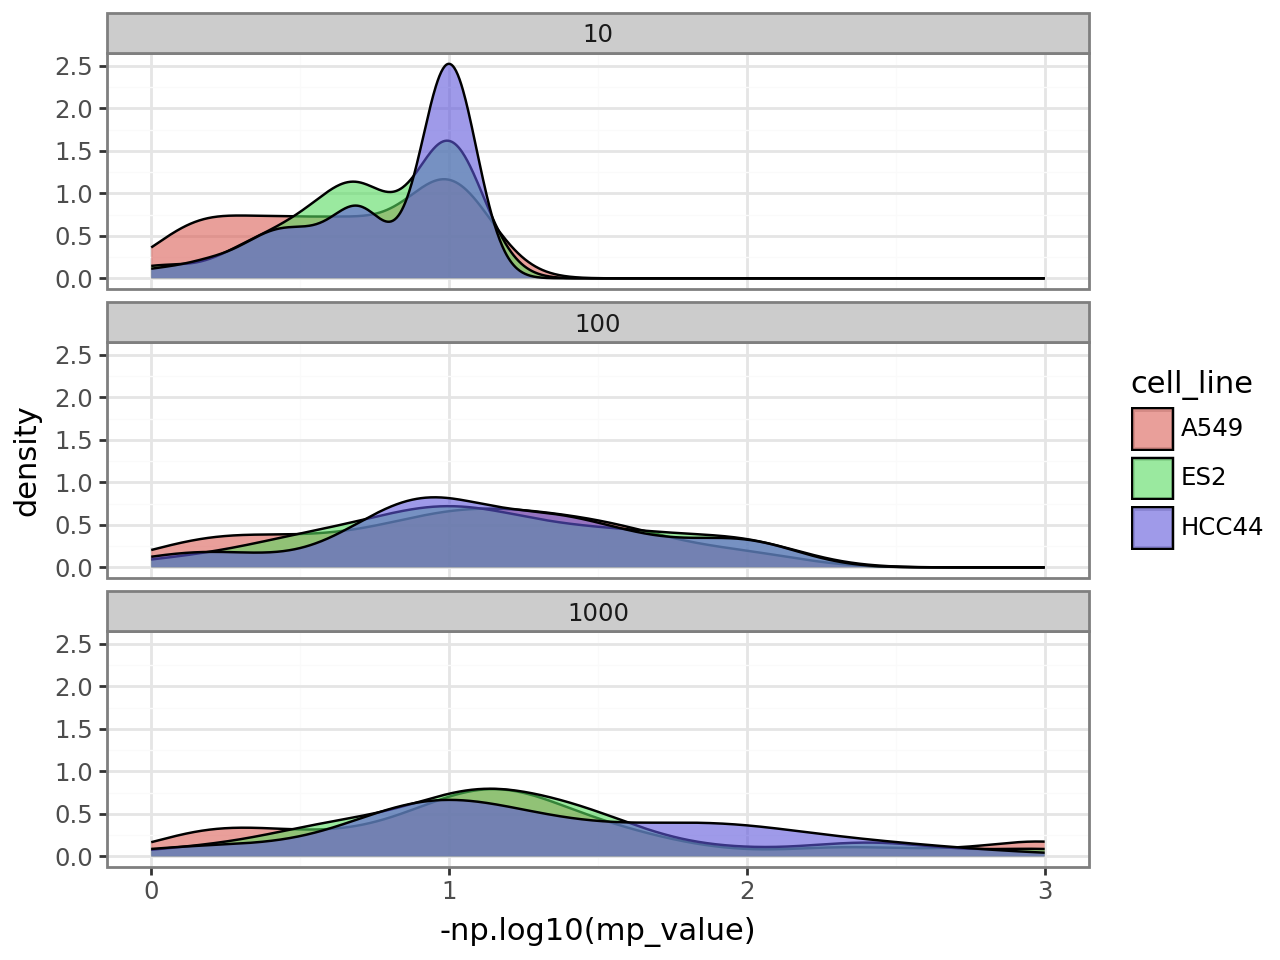

In [38]:
(
    gg.ggplot(mp_values, gg.aes(x="-np.log10(mp_value)"))
    + gg.geom_density(gg.aes(fill="cell_line"), alpha=0.6)
    + gg.facet_wrap("~permutations", nrow=3)
    + gg.theme_bw()
)

### Part 4: Grit

`operation="grit"`

Grit is a metric that represents the strength and reproducibility of a given perturbation.

The strength of the perturbation is measured relative to a reference panel of controls.
The reproducibility of the pertubation is measured relative to perturbation replicates. 

For more details about the metric and to observe its behavior, see https://github.com/broadinstitute/grit-benchmark.

#### The replicate_groups variable

Of all metrics, `grit` requires a slightly more complicated `replicate_groups` variable.

In `grit`, the variable must be a dictionary with two keys: "profile_col" and "replicate_group_col".

- "profile_col" - this column stores profile identifiers.
    - It can include unique entries, but it is not required.
    - `cytominer_eval` will calculate grit for each perturbation in the "profile_col"
- "replicate_group_col" - this column stores replicate and group identifiers.
    - Typically one higher level "above" the profile_col, the replicate_group_col indicates how the profiles should be grouped together
  
In a CRISPR experiment, for example, the "profile_col" stores guide profiles while the "replicate_group_col" stores the guide targets.
If multiple guides target the same gene, `grit` will determine the reproducibility and strength of the guide.

In [39]:
grit_replicate_groups = {
    "profile_col": "Metadata_pert_name",
    "replicate_group_col": "Metadata_gene_name"
}

In [40]:
grit_scores = []

for cell_line in df.Metadata_cell_line.unique():
    cell_line_df = df.query("Metadata_cell_line == @cell_line")
    
    grit_results = evaluate(
        profiles=cell_line_df,
        features=features,
        meta_features=meta_features,
        replicate_groups=grit_replicate_groups,
        operation="grit",
        similarity_metric="pearson",
        grit_replicate_summary_method="median",
        grit_control_perts=control_perts
    ).assign(cell_line=cell_line)

    grit_scores.append(grit_results)

 pairwise_metric shape is (1152, 1152)
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pairwise_metric shape is (1152, 1152)
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {'index': 'pair_b_index', 'suffix': '_pair_b'}
 pair_a is:
 {'index': 'pair_a_index', 'suffix': '_pair_a'}

 pair_b is:
 {

In [19]:
grit_scores = pd.concat(grit_scores).reset_index(drop=True)
print(grit_scores.shape)


(357, 4)


,perturbation,group,grit,cell_line
0,AKT1-1,AKT1,0.918037,HCC44
1,AKT1-2,AKT1,0.858680,HCC44
2,ARID1B-1,ARID1B,0.304972,HCC44
3,ARID1B-2,ARID1B,0.096940,HCC44
4,ATF4-1,ATF4,-0.122386,HCC44


In [ ]:
grit_scores.head()

/Users/mbornhol/miniconda3/envs/noncyto/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 18 rows containing non-finite values.


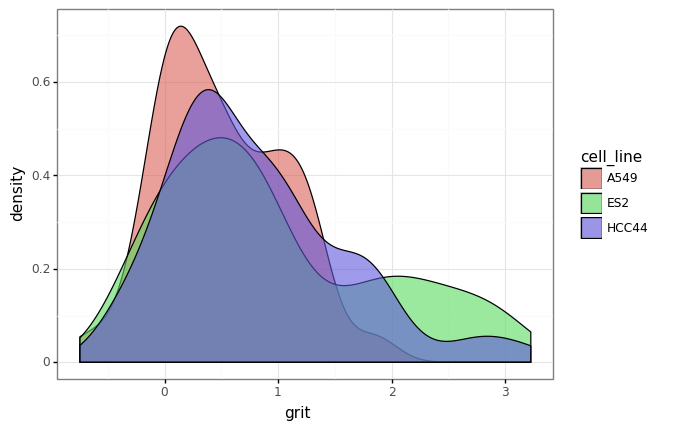

<ggplot: (8790176556358)>

In [20]:
(
    gg.ggplot(grit_scores, gg.aes(x="grit"))
    + gg.geom_density(gg.aes(fill="cell_line"), alpha=0.6)
    + gg.theme_bw()
)

## Part 5: enrichment
Use the enrichment analysis developed by Shantanu and Juan. It looks at the shortest connections within the dataset and evaluates based score is based on the fisher exact odds score
`operation="enichment"`

In [21]:
percent_list = [0.99, 0.98, 0.97, 0.96]

enrichment_result = evaluate(
    profiles=df,
    features=features,
    meta_features=meta_features,
    replicate_groups=["Metadata_gene_name"],
    operation="enrichment",
    similarity_metric="pearson",
    enrichment_percentile= percent_list,
)

In [22]:
enrichment_result[["enrichment_percentile","ods_ratio"]]

,enrichment_percentile,ods_ratio
0,0.99,3.685582
1,0.98,2.597346
2,0.97,2.116626
3,0.96,1.875379


## Combine metrics and generate a combined prioritization rank

In [23]:
merge_cols = ["Metadata_gene_name", "Metadata_pert_name", "cell_line"]

metric_df = (
    pairwise_corr_df.merge(
        precision_recall_at_k.query("k == 25"),
        on=merge_cols
    )
    .merge(
        mp_values.query("permutations == 1000"),
        on=["Metadata_pert_name", "cell_line"]
    )
    .merge(
        grit_scores,
        left_on=merge_cols,
        right_on=["group", "perturbation", "cell_line"],
    )
    .rename(
        {
            "similarity_metric": "median_correlation",
            "k": "precision_recall_k",
            "permutations": "mp_value_permutations"
        },
        axis="columns"
    )
)
    
print(metric_df.shape)
metric_df.head()

(357, 12)


,Metadata_gene_name,Metadata_pert_name,median_correlation,cell_line,precision_recall_k,precision,recall,mp_value,mp_value_permutations,perturbation,group,grit
0,AKT1,AKT1-1,0.240928,HCC44,25.0,0.16,0.133333,0.115,1000,AKT1-1,AKT1,0.918037
1,AKT1,AKT1-2,0.178413,HCC44,25.0,0.08,0.066667,0.161,1000,AKT1-2,AKT1,0.858680
2,ARID1B,ARID1B-1,0.220200,HCC44,25.0,0.00,0.000000,0.094,1000,ARID1B-1,ARID1B,0.304972
3,ARID1B,ARID1B-2,0.133993,HCC44,25.0,0.00,0.000000,0.138,1000,ARID1B-2,ARID1B,0.096940
4,ATF4,ATF4-1,0.797046,HCC44,25.0,0.00,0.000000,0.002,1000,ATF4-1,ATF4,-0.122386


/Users/mbornhol/miniconda3/envs/noncyto/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


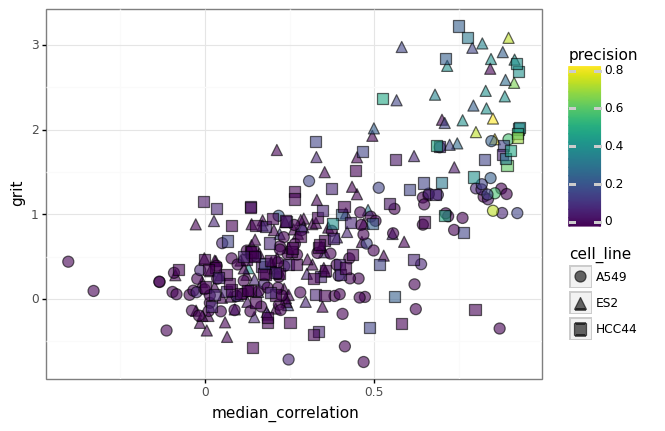

<ggplot: (8790074077323)>

In [24]:
(
    gg.ggplot(metric_df, gg.aes(x="median_correlation", y="grit"))
    + gg.geom_point(gg.aes(fill="precision", shape="cell_line"), size=4, alpha=0.6)
    + gg.theme_bw()
)

/Users/mbornhol/miniconda3/envs/noncyto/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10


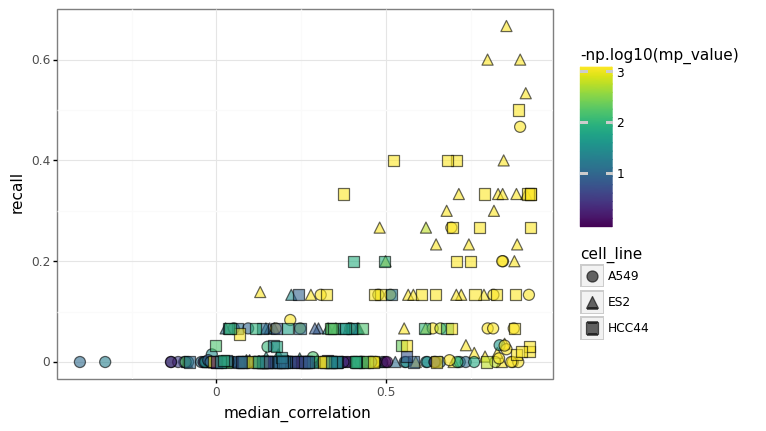

<ggplot: (8790075732505)>

In [25]:
(
    gg.ggplot(metric_df, gg.aes(x="median_correlation", y="recall"))
    + gg.geom_point(gg.aes(fill="-np.log10(mp_value)", shape="cell_line"), size=4, alpha=0.6)
    + gg.theme_bw()
)

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()

metric_summary_df = (
    metric_df
    .assign(
        metric_sum_scaled=(
            min_max_scaler.fit_transform(metric_df.grit.values.reshape(-1, 1)) + 
            min_max_scaler.fit_transform(metric_df.median_correlation.values.reshape(-1, 1)) +
            min_max_scaler.fit_transform(metric_df.precision.values.reshape(-1, 1)) +
            min_max_scaler.fit_transform(metric_df.recall.values.reshape(-1, 1)) -
            min_max_scaler.fit_transform(metric_df.mp_value.values.reshape(-1, 1))
        )
    )
    .sort_values(by="metric_sum_scaled", ascending=False)
    .reset_index(drop=True)
    .dropna()
)

metric_summary_df.head(10)

,Metadata_gene_name,Metadata_pert_name,median_correlation,cell_line,precision_recall_k,precision,recall,mp_value,mp_value_permutations,perturbation,group,grit,metric_sum_scaled
0,MYC,MYC-1,0.896095,ES2,25.0,0.72,0.600000,0.0,1000,MYC-1,MYC,3.087105,3.741246
1,YAP1,YAP1-2,0.855538,ES2,25.0,0.80,0.666667,0.0,1000,YAP1-2,YAP1,1.888577,3.609051
2,CCND1,CCND1-2,0.912482,ES2,25.0,0.64,0.533333,0.0,1000,CCND1-2,CCND1,2.555242,3.419675
3,EGLN1,EGLN1-9,0.799812,ES2,25.0,0.72,0.600000,0.0,1000,EGLN1-9,EGLN1,1.972640,3.388326
4,CDK2,CDK2-2,0.891436,HCC44,25.0,0.60,0.500000,0.0,1000,CDK2-2,CDK2,1.582908,3.059086
5,ITGAV,ITGAV-2,0.895882,A549,25.0,0.56,0.466667,0.0,1000,ITGAV-2,ITGAV,1.886879,3.038947
6,CDK4,CDK4-2,0.913841,ES2,25.0,0.40,0.333333,0.0,1000,CDK4-2,CDK4,2.829412,2.889714
7,ITGAV,ITGAV-2,0.919061,HCC44,25.0,0.40,0.333333,0.0,1000,ITGAV-2,ITGAV,2.783719,2.882135
8,ITGAV,ITGAV-1,0.925652,HCC44,25.0,0.40,0.333333,0.0,1000,ITGAV-1,ITGAV,2.689741,2.863432
9,GPX4,GPX4-1,0.844319,ES2,25.0,0.40,0.333333,0.0,1000,GPX4-1,GPX4,2.836964,2.839359


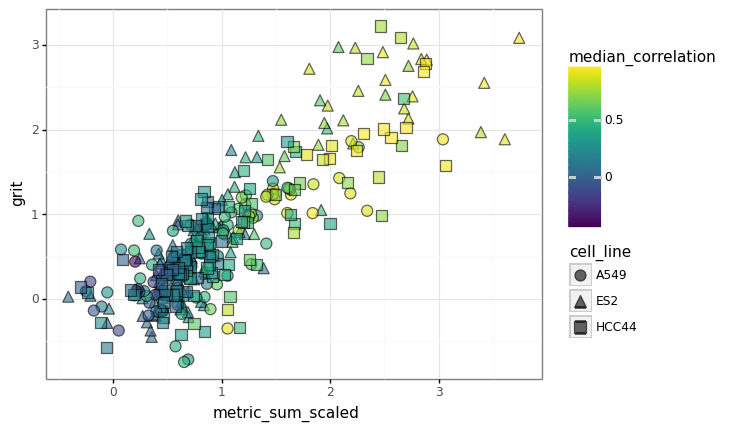

<ggplot: (8790073997343)>

In [27]:
(
    gg.ggplot(metric_summary_df, gg.aes(x="metric_sum_scaled", y="grit"))
    + gg.geom_point(gg.aes(fill="median_correlation", shape="cell_line"), size=4, alpha=0.6)
    + gg.theme_bw()
)

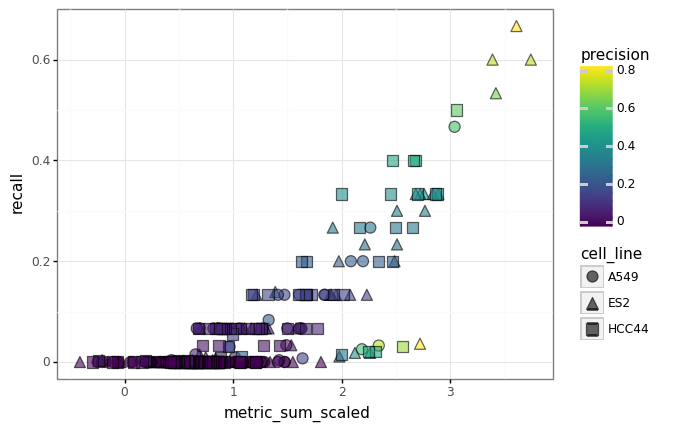

<ggplot: (8790074061942)>

In [28]:
(
    gg.ggplot(metric_summary_df, gg.aes(x="metric_sum_scaled", y="recall"))
    + gg.geom_point(gg.aes(fill="precision", shape="cell_line"), size=4, alpha=0.6)
    + gg.theme_bw()
)